# Análise de Crédito - Projeto EBAC

**Conteúdo**<a id='toc0_'></a>    
- [Pré-processamento](#toc1_1_)    
    - [Importação das bibliotecas](#toc1_1_1_)    
    - [Definição de algumas funções utilizadas no notebook](#toc1_1_2_)    
  - [Carregamento da base e inspeção dos dados](#toc1_2_)    
    - [Carregamento, inspeção e modificações iniciais](#toc1_2_1_)    
    - [Entendimento da base de trabalho](#toc1_2_2_)    
  - [Visualização dos dados](#toc1_3_)    
    - [Investigação das colunas numéricas](#toc1_3_1_)    
    - [Verificação das variáveis categóricas](#toc1_3_2_)    
  - [Inspecionando as relações numéricas](#toc1_4_)    
  - [Conclusão](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Esse notebook documenta o processo de análise de crédito de clientes de uma base fictícia, criada pelo professor André Perez, da EBAC. O processo de concessão de crédito é normalmente complexo e envolve uma série de variáveis, por isso, é importante traçar uma estratégia eficiente na segmentação dos clientes a fim de não perder possíveis clientes pagantes e não aumentar os índices de inadimplência. Esse notebook realiza o processamento dos dados do dataset, além da limpeza, "feature engeneering" e visualização das variáveis da base.

## <a id='toc1_1_'></a>[Pré-processamento](#toc0_)

### <a id='toc1_1_1_'></a>[Importação das bibliotecas](#toc0_)

In [1]:
import pandas as pd #v2.0.2
import matplotlib.pyplot as plt  #v3.6.3
import seaborn as sns #v0.12.2

### <a id='toc1_1_2_'></a>[Definição de algumas funções utilizadas no notebook](#toc0_)

In [90]:
def plota_variaveis_numericas(dataframe: pd.DataFrame, conjunto: list, alvo: str, titulo: str, modo='barra', tamanho_figura = (15,30), i=0) -> None:
    nrows = int(round(len(conjunto)/2, 0))
    
    if nrows < (len(conjunto)/2):
        nrows += 1

    fig, axes = plt.subplots(ncols=2, nrows=nrows, figsize=tamanho_figura, facecolor='white')
    axes = axes.flatten()
    fig.suptitle(titulo)
    #fig.subplots_adjust(hspace=0.8, wspace=0.3)


    for item in conjunto:
        if modo == 'barra':
            sns.barplot(x=dataframe[alvo], y=dataframe[item], ax=axes[i], color='#435058')
            axes[i].set_title(item)

        elif modo=='histograma':
            sns.histplot(x=dataframe[item], ax=axes[i], color='#435058')
            axes[i].axvline(x=dataframe[item].mean(), linestyle='--', color='red')
            axes[i].axvline(x=dataframe[item].median(), linestyle='--', color='green')
            axes[i].set_title(item + '. Média = {:.2f}, Mediana = {:.2f}'.format(dataframe[item].mean(), dataframe[item].median()))

        if dataframe[item].nunique() > 6:
            axes[i].xaxis.set_tick_params(rotation=90)

        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        i += 1
   
    fig.tight_layout(pad=2)

def plota_contagens(dataframe: pd.DataFrame, conjunto: list, alvo: str, titulo: str, tamanho_figura = (15,22), i=0) -> None:
    nrows = int(round(len(conjunto)/2, 0))

    if nrows < (len(conjunto)/2):
        nrows += 1

    fig, axes = plt.subplots(ncols=2, nrows=nrows, figsize=tamanho_figura, facecolor='white')
    axes = axes.flatten()
    fig.suptitle(titulo)

    for item in conjunto:
        sns.countplot(x=dataframe[item], ax=axes[i], palette='Paired', hue=dataframe[alvo])
        axes[i].set_title(item)
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        i += 1
        
    fig.tight_layout(pad=2)


def plota_dispersao(dataframe: pd.DataFrame, conjunto: list, var: str, titulo: str, legenda=None, tamanho_figura = (20,12), i=0) -> None:
    nrows = int(round(len(conjunto)/2, 0))

    if nrows < (len(conjunto)/2):
        nrows += 1

    fig, axes = plt.subplots(ncols=2, nrows=nrows, figsize=tamanho_figura, facecolor='white')
    axes = axes.flatten()
    fig.suptitle(titulo)


    for item in conjunto:
        if legenda is not None:
            sns.scatterplot(x=dataframe[var], y=dataframe[item], ax=axes[i], hue=dataframe[legenda])
        else:
            sns.scatterplot(x=dataframe[var], y=dataframe[item], ax=axes[i])

        i += 1
    fig.tight_layout(pad=2)


## <a id='toc1_2_'></a>[Carregamento da base e inspeção dos dados](#toc0_)

### <a id='toc1_2_1_'></a>[Carregamento, inspeção e modificações iniciais](#toc0_)

In [3]:
df = pd.read_csv('dados_credito.csv')

In [4]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


A partir da inspeção inicial da base de dados é possível observar que algumas colunas foram importadas com o tipo errado. As colunas "limite_credito" e "valor_transacoes_12m" deveriam ser lidas como colunas de tipo numérico, mas foram importadas como objetos porque possuem pontos e vírgulas que o pandas não entende. Nesse caso, é importante corrigir o tipo das colunas

In [5]:
df['limite_credito'] = df['limite_credito'].apply(lambda x: float(x.replace('.','').replace(',', '.')))
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda x: float(x.replace('.','').replace(',', '.')))

### <a id='toc1_2_2_'></a>[Entendimento da base de trabalho](#toc0_)

A base possui pouco mais de 10.000 entradas, com colunas numéricas do tipo int e categóricas do tipo object. Nenhuma coluna apresenta valor nulo.

In [6]:
print(df.shape)
df.info()

(10127, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10127 non-null  int64  
 1   default                  10127 non-null  int64  
 2   idade                    10127 non-null  int64  
 3   sexo                     10127 non-null  object 
 4   dependentes              10127 non-null  int64  
 5   escolaridade             10127 non-null  object 
 6   estado_civil             10127 non-null  object 
 7   salario_anual            10127 non-null  object 
 8   tipo_cartao              10127 non-null  object 
 9   meses_de_relacionamento  10127 non-null  int64  
 10  qtd_produtos             10127 non-null  int64  
 11  iteracoes_12m            10127 non-null  int64  
 12  meses_inativo_12m        10127 non-null  int64  
 13  limite_credito           10127 non-null  float64
 14  valor_tran

Para facilitar o entendimento da base, são feitas análises a partir dos tipos das colunas

In [7]:
df = df.drop('id', axis=1) #A coluna id é uma chave primária que não ajuda na análise dos dados
df['default'] = df['default'].astype('object') #A coluna default é um valor binário, a conversão para variável categórica ajuda na análise

v_resp = 'default' #indica se o cliente é inadimplente (1) ou não (0)
v_num = df.select_dtypes(include=['int', 'float']).columns
v_cat = df.select_dtypes(include=['object']).columns

In [8]:
df.describe(exclude='object').transpose() 

,count,mean,std,min,25%,50%,75%,max
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Um perfil médio de cliente pode ser considerado como o de uma pessoa com cerca de 46 anos, 2 dependentes e contratação de 3 produtos. O limite de crédito média é de R$8632, no entanto, esse valor deve ser revisado, uma vez que o alto valor do desvio padrão e a diferença entre o 3° quartil e o valor máximo indicam que podem existir outliers influenciando a média nessa categoria. Situação semelhante ocorre com o valor das transações.

In [9]:
_ = df.describe(include='object').transpose()
_['freq_perc'] = _['freq'].apply(lambda x: round((x/len(df))*100), 2) #Apenas para obter o valor percentual da frequência
_

,count,unique,top,freq,freq_perc
default,10127,2,0,8500,84
sexo,10127,2,F,5358,53
escolaridade,10127,6,mestrado,3128,31
estado_civil,10127,4,casado,4687,46
salario_anual,10127,6,menos que $40K,3561,35
tipo_cartao,10127,4,blue,9436,93


Todas as variáveis categóricas tem cardinalidade relativamente baixa, sendo as variáveis de escolaridade e salário_anual as com maior número de distinções. A base é relativamente equiparada em relação aos dados de gênero e estado cívil e bem desbalanceada em relação ao tipo de cartão do cliente. Quase 1/3 dos clientes possuem mestrado e mais de 35% dos usuários possuem renda menor que 40 mil anuais (a categoria mais baixa).
A inspeção da variável resposta indica que "apenas" 16% dos clientes são inadimplentes, o que indica um desbalanceamento do dataset em relação à variável resposta.

## <a id='toc1_3_'></a>[Visualização dos dados](#toc0_)

A visualização inicial da base já deu algum panorama sobre o comportamento das colunas, mas a visualização gráficas dessas deve ajudar a consolidar o conhecimento sobre os dados trabalhados. Além disso, a grande discrepância entre o número de adimplentes e inadimplentes faz necessária uma segregação de colunas a partir dessas categorias, visando o entendimento do perfil relacionado a esses dois tipos de clientes.

### <a id='toc1_3_1_'></a>[Investigação das colunas numéricas](#toc0_)

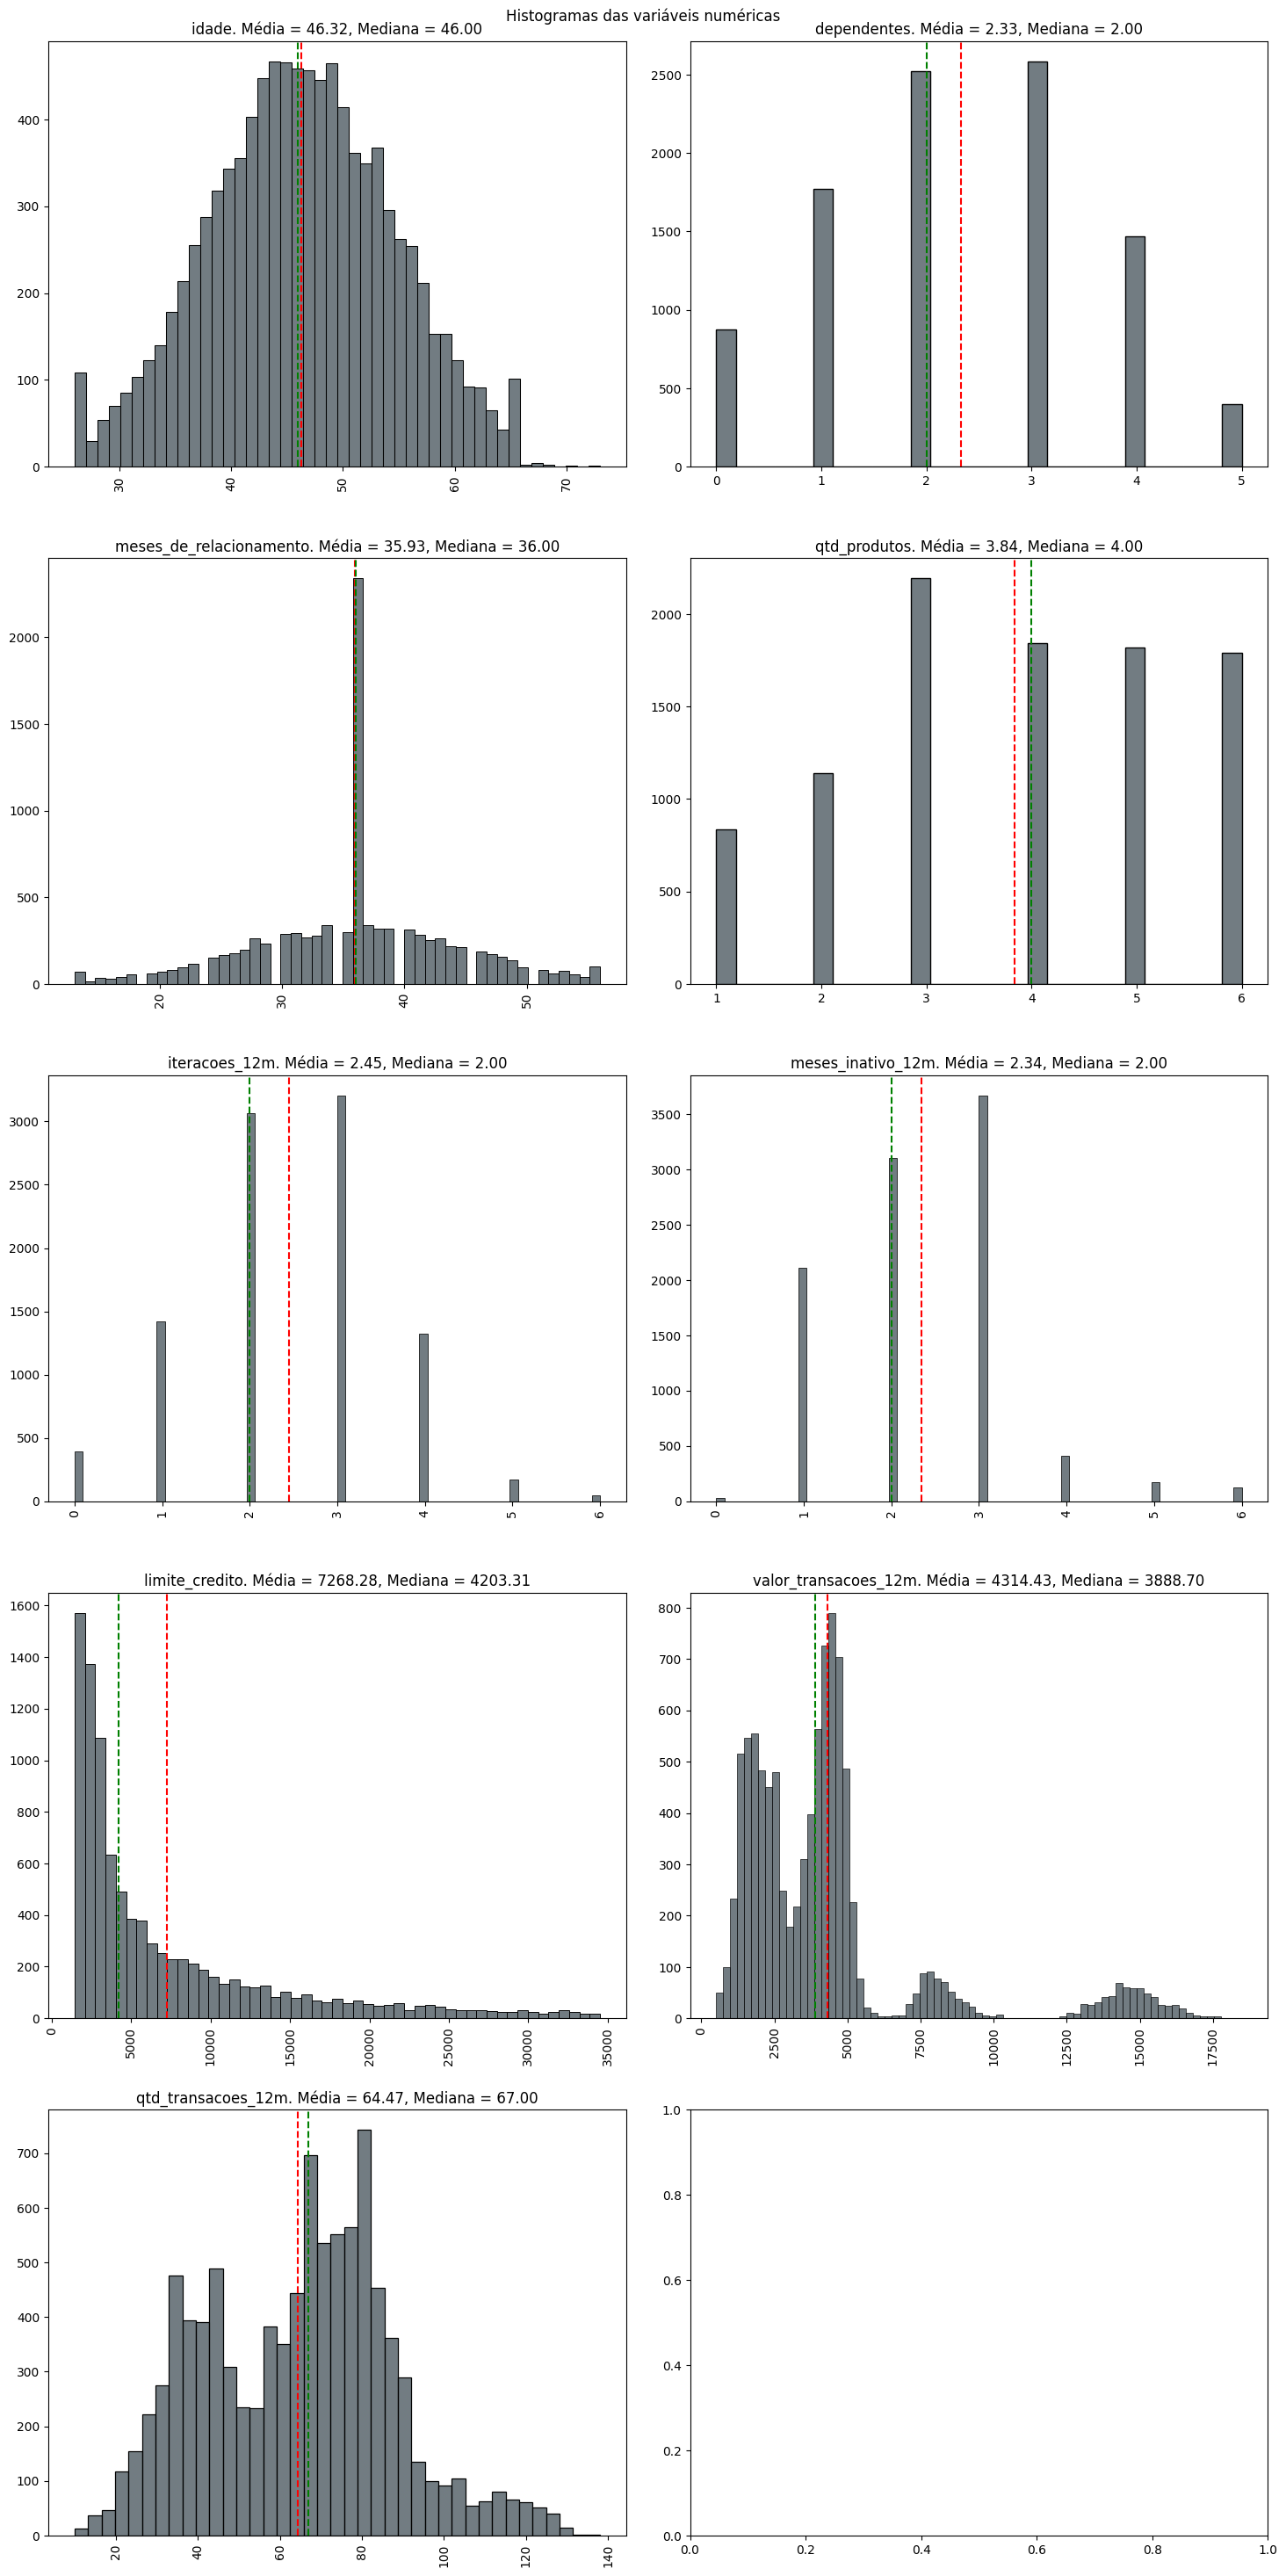

In [54]:
plota_variaveis_numericas(dataframe=df, conjunto=v_num, alvo=v_resp, titulo='Histogramas das variáveis numéricas', modo='histograma')

Algumas colunas tem distribuições muito desbalanceadas e que interferem no valor da média, indicativos disso são as distribuição com cauda alongada e as grandes diferenças entre média e mediana. Tomando esses parâmetros como horizonte de decisão e procurando diminuir o mínimo possível o número de observações na base, decidi remover os valores outliers da variável de limite de crédito. A remoção dos valores correspondentes aos 5% maiores deve dar um quadro mais factível da situação dos clientes.

In [11]:
df = df[df['limite_credito'] < df['limite_credito'].quantile(0.95)]
print(df.shape)

_ = df.describe(include='object').transpose() 
_['freq_perc'] = _['freq'].apply(lambda x: round((x/len(df))*100), 2) #Apenas para obter o valor percentual da frequência
_

(9620, 15)


,count,unique,top,freq,freq_perc
default,9620,2,0,8082,84
sexo,9620,2,F,5318,55
escolaridade,9620,6,mestrado,2967,31
estado_civil,9620,4,casado,4497,47
salario_anual,9620,6,menos que $40K,3561,37
tipo_cartao,9620,4,blue,9239,96


Como o percentual de participação de adimplentes e inadimplentes na base não foi alterado a partir da remoção das linhas, a análise não será prejudicada. O próximo passo é verificar a média dos valores numéricos em relação a cada categoria da variável resposta, a ideia aqui é identificar variáveis de diferenciação entre adimplentes e inadimplentes

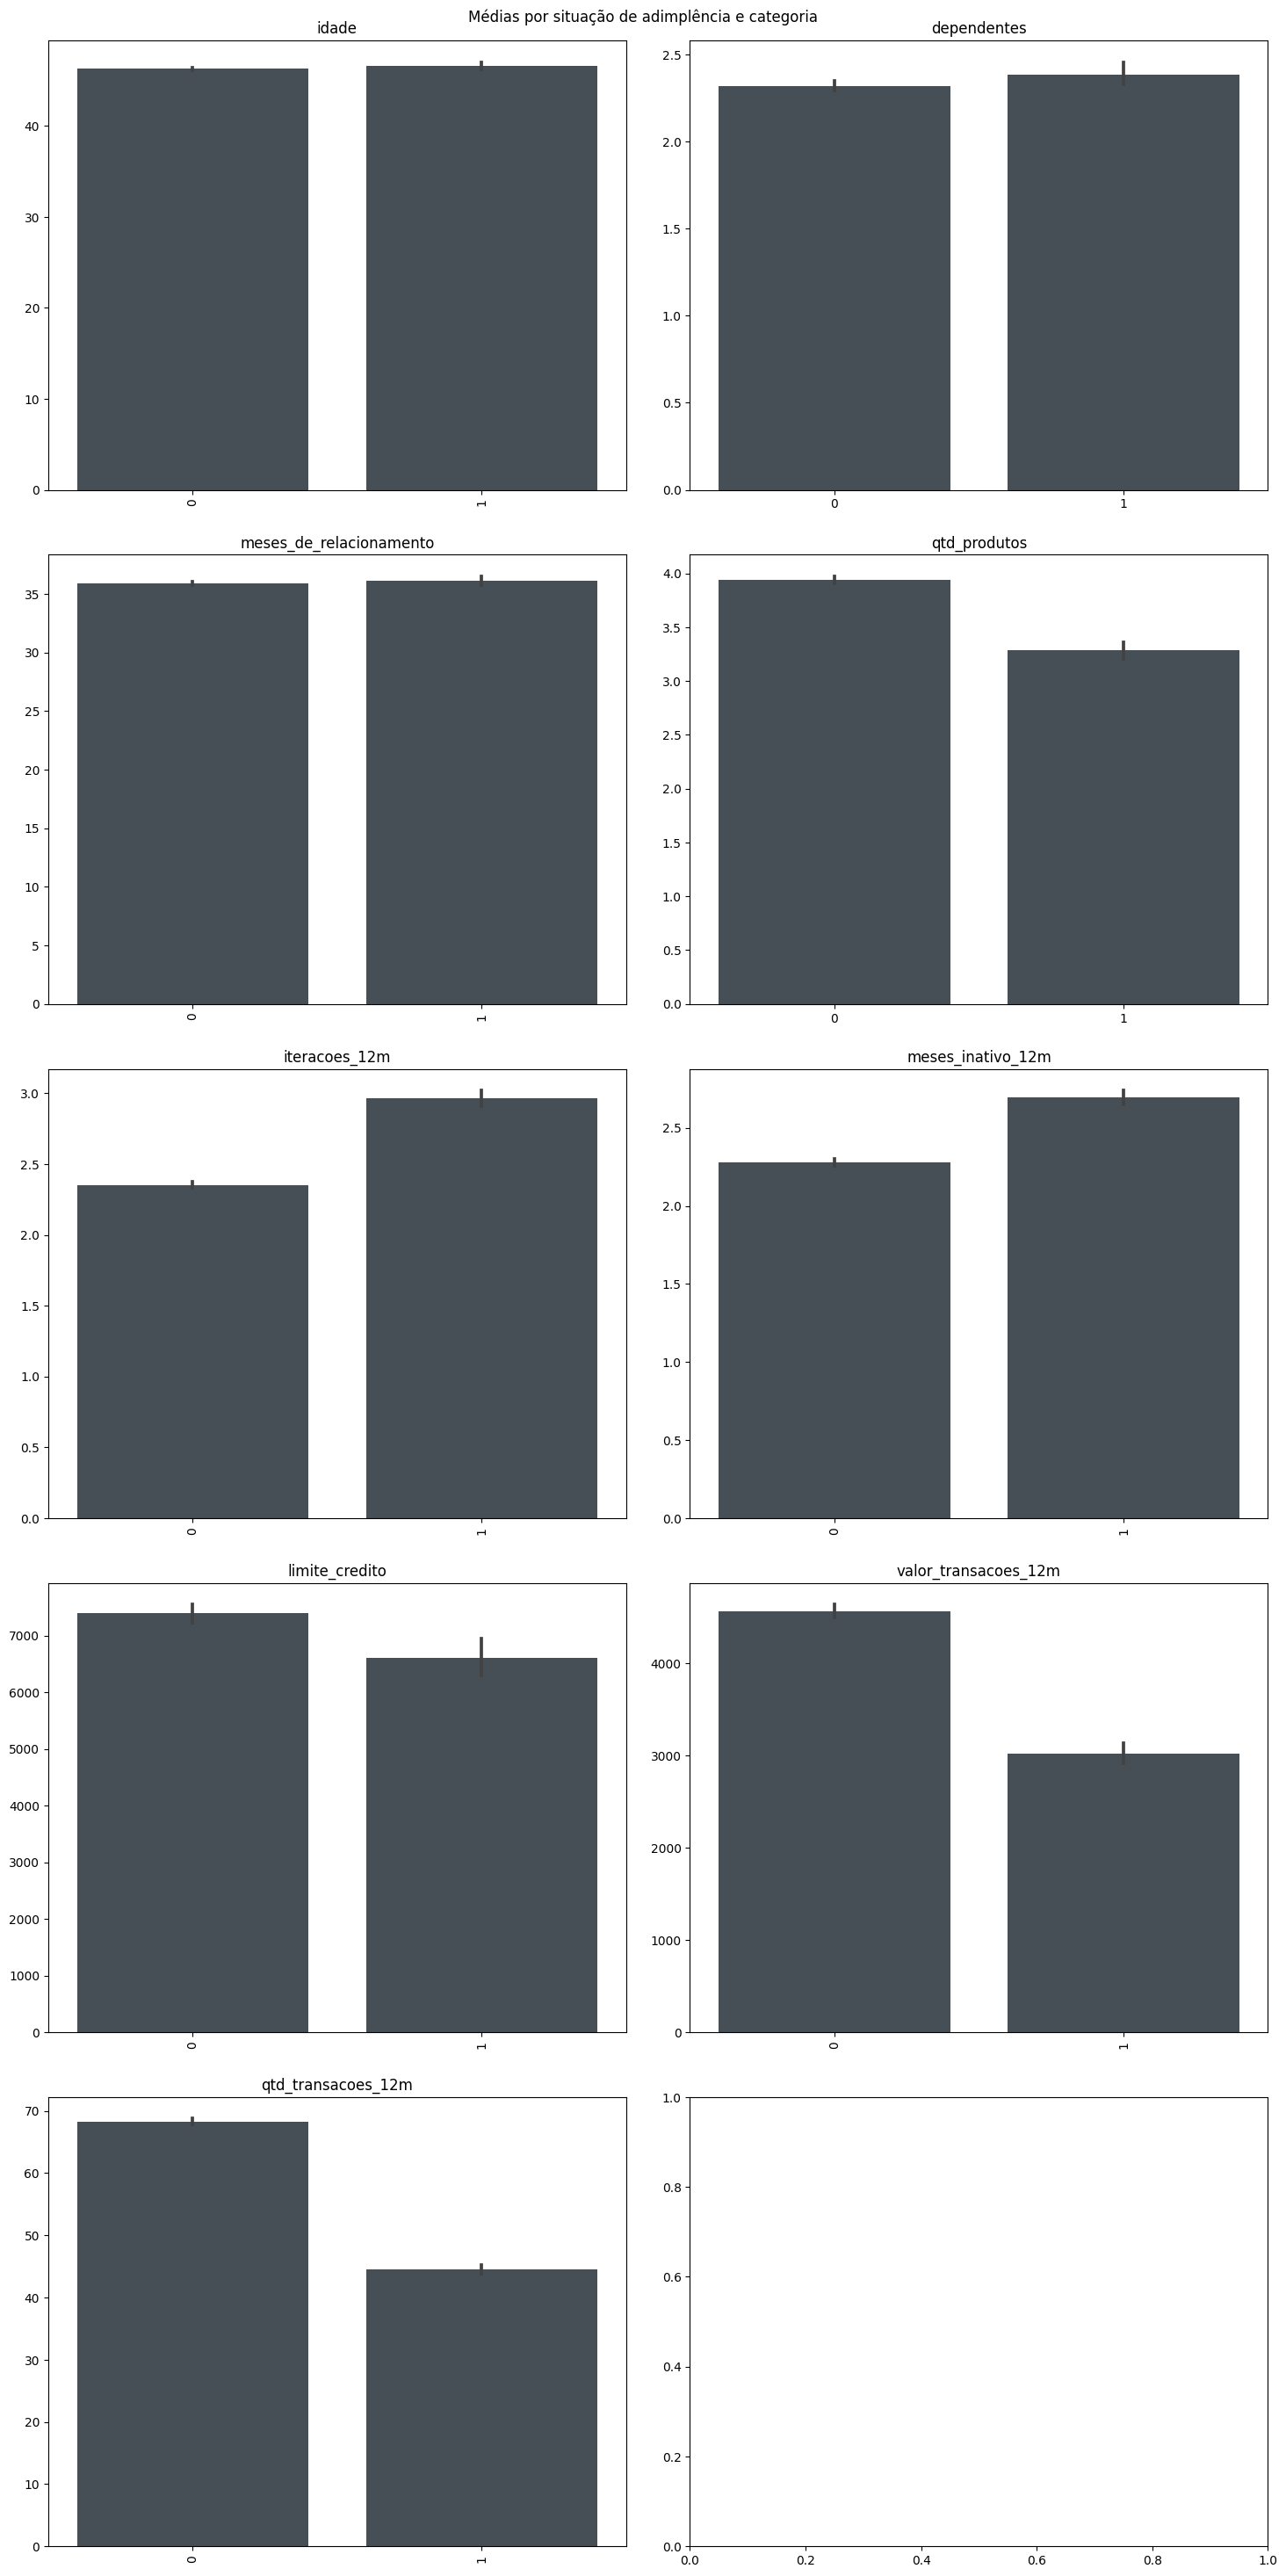

In [35]:
plota_variaveis_numericas(dataframe=df, conjunto=v_num, alvo=v_resp, titulo='Médias por situação de adimplência e categoria', modo='barra')

As maiores diferenciações entre clientes adimplentes e inadimplentes estão na quantidade de transações realizadas dentro do período de um ano e no valor dessas transações, clientes inadimplentes realizaram menos transações, com menor valor em média. Além disso, clientes inadimplentes ficaram mais meses inativos e realizaram um número maior de iterações. clientes inadimplentes tem, em média, menor quantidade de crédito disponível. 

### <a id='toc1_3_2_'></a>[Verificação das variáveis categóricas](#toc0_)

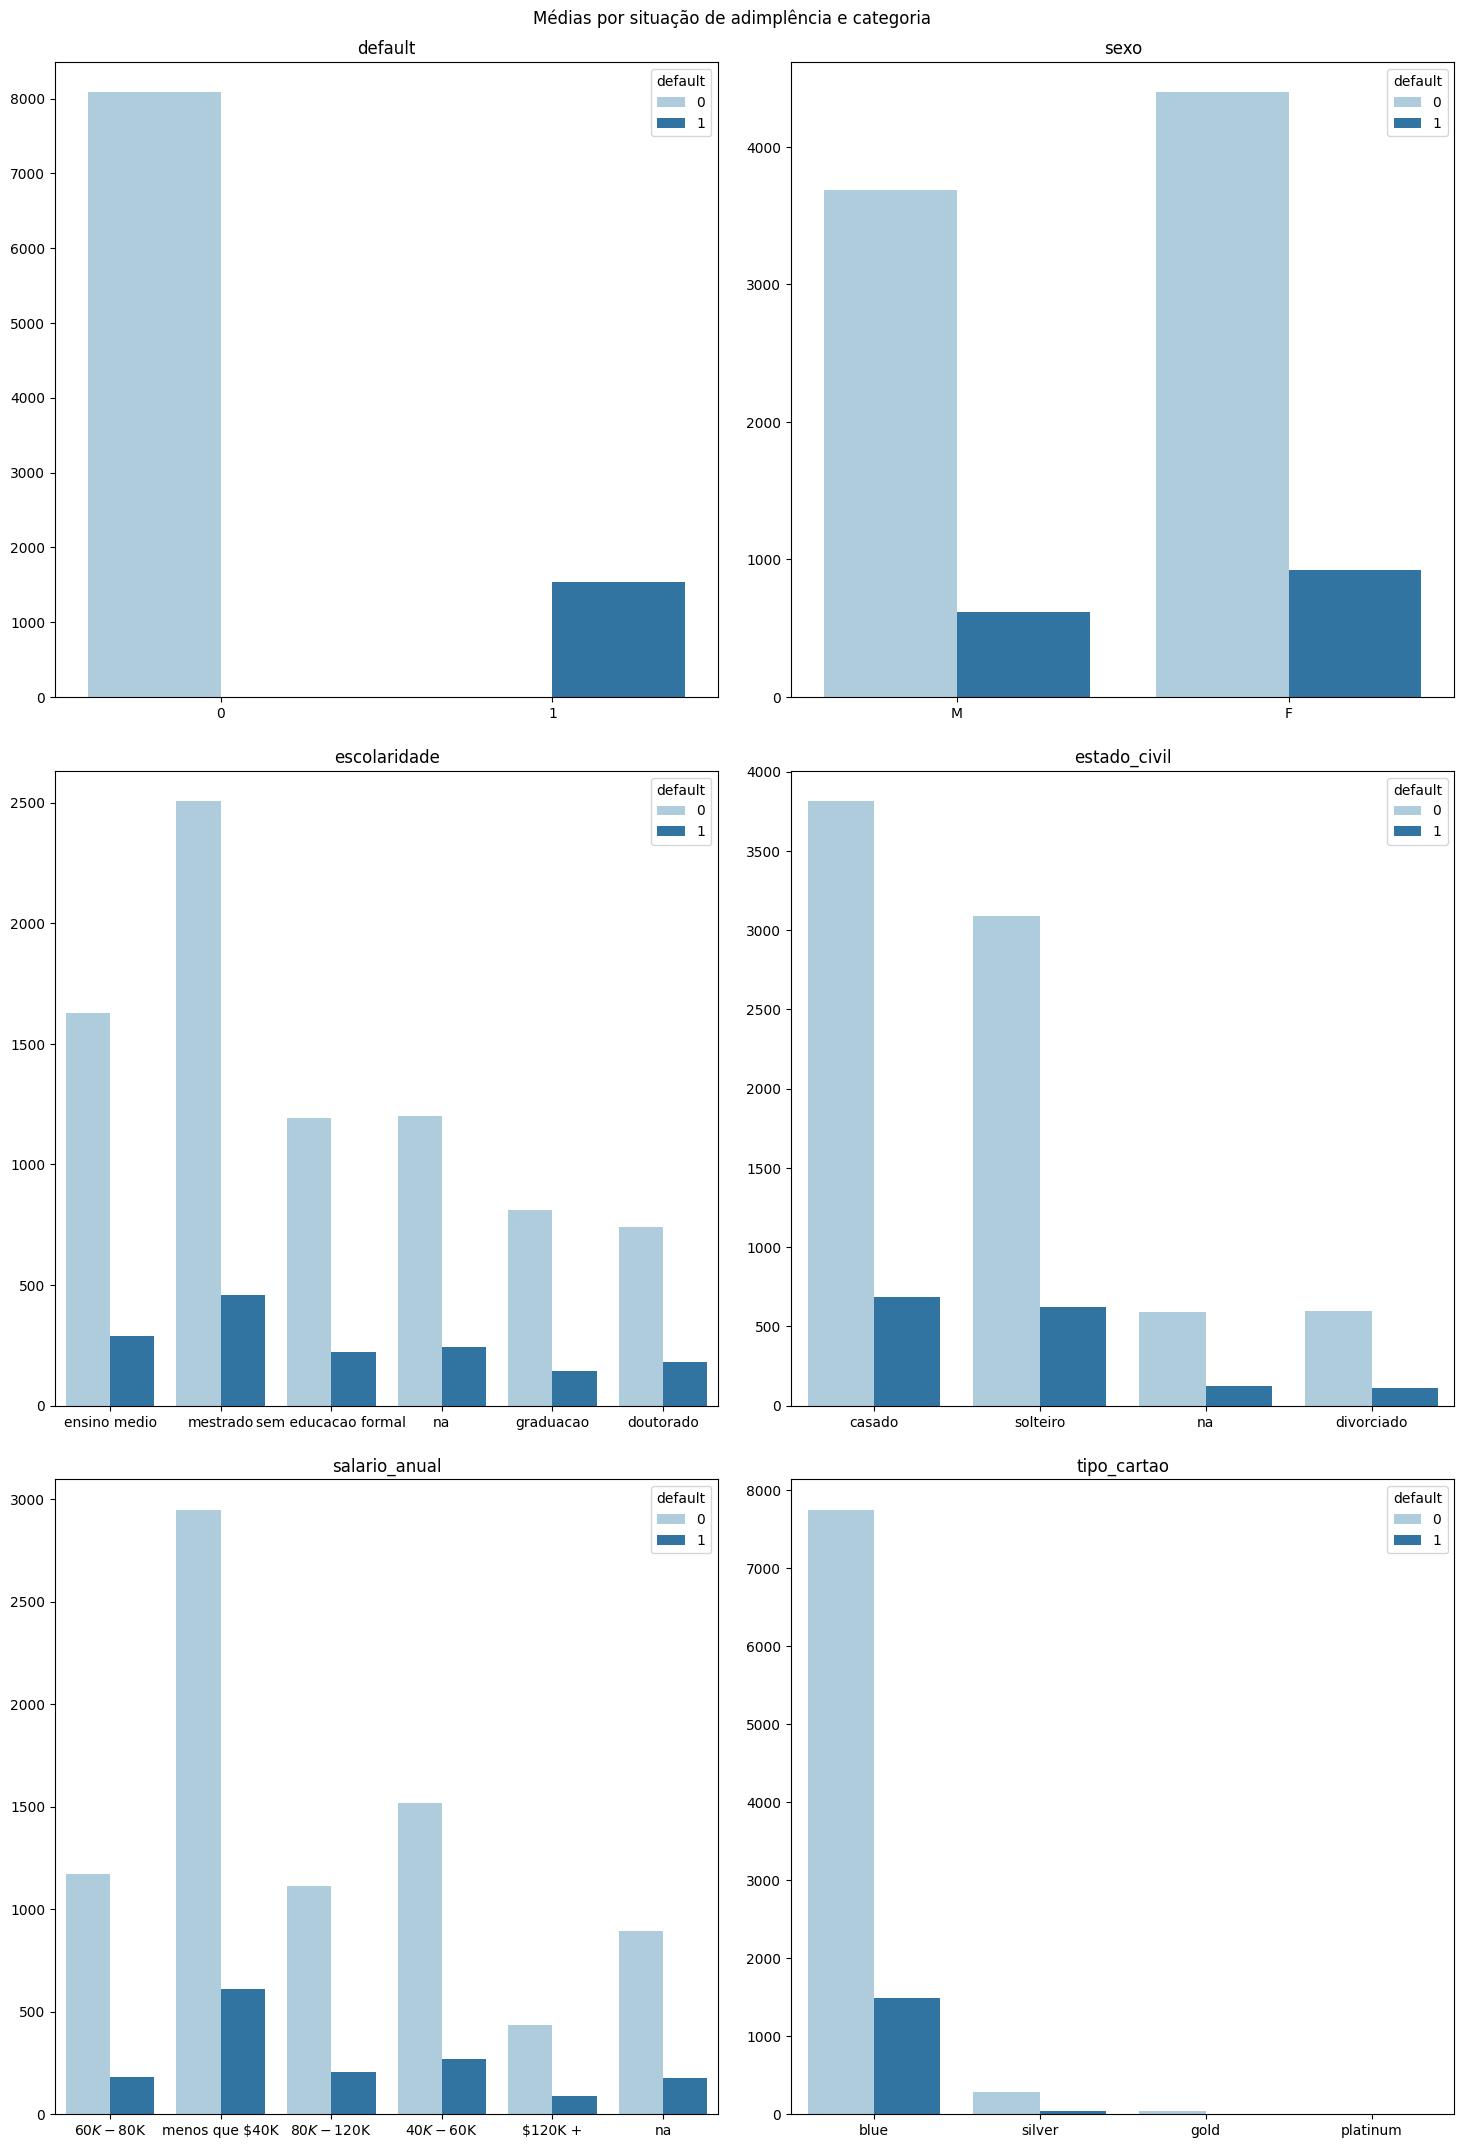

In [56]:
plota_contagens(dataframe=df, conjunto=v_cat, alvo=v_resp, titulo='Médias por situação de adimplência e categoria')

A dinâmica de participação de adimplentes e inadimplentes é muito semelhante entre todas as variáveis categóricas visualizadas. Isso significa que a inadimplência do usuário não está relacionada a uma categoria específica de alguma das variáveis categóricas da base.

## <a id='toc1_4_'></a>[Inspecionando as relações numéricas](#toc0_)

Anteriormente foi possível obter bons insights a partir das variáveis numéricas. Nesse momento, interessa entender a relação de dispersão entre as variáveis numéricas contínuas e sua relação com a situação de adimplência. Assim, é possível verificar diferenças no perfil do cliente inadimplente em relação aos outros. Para a visualização da relação de dispersão foram selecionadas as variáveis numéricas que ocasionam maior distinção entre os tipos de cliente: quantidade de transações, valor dessas transações e limite de crédito. 

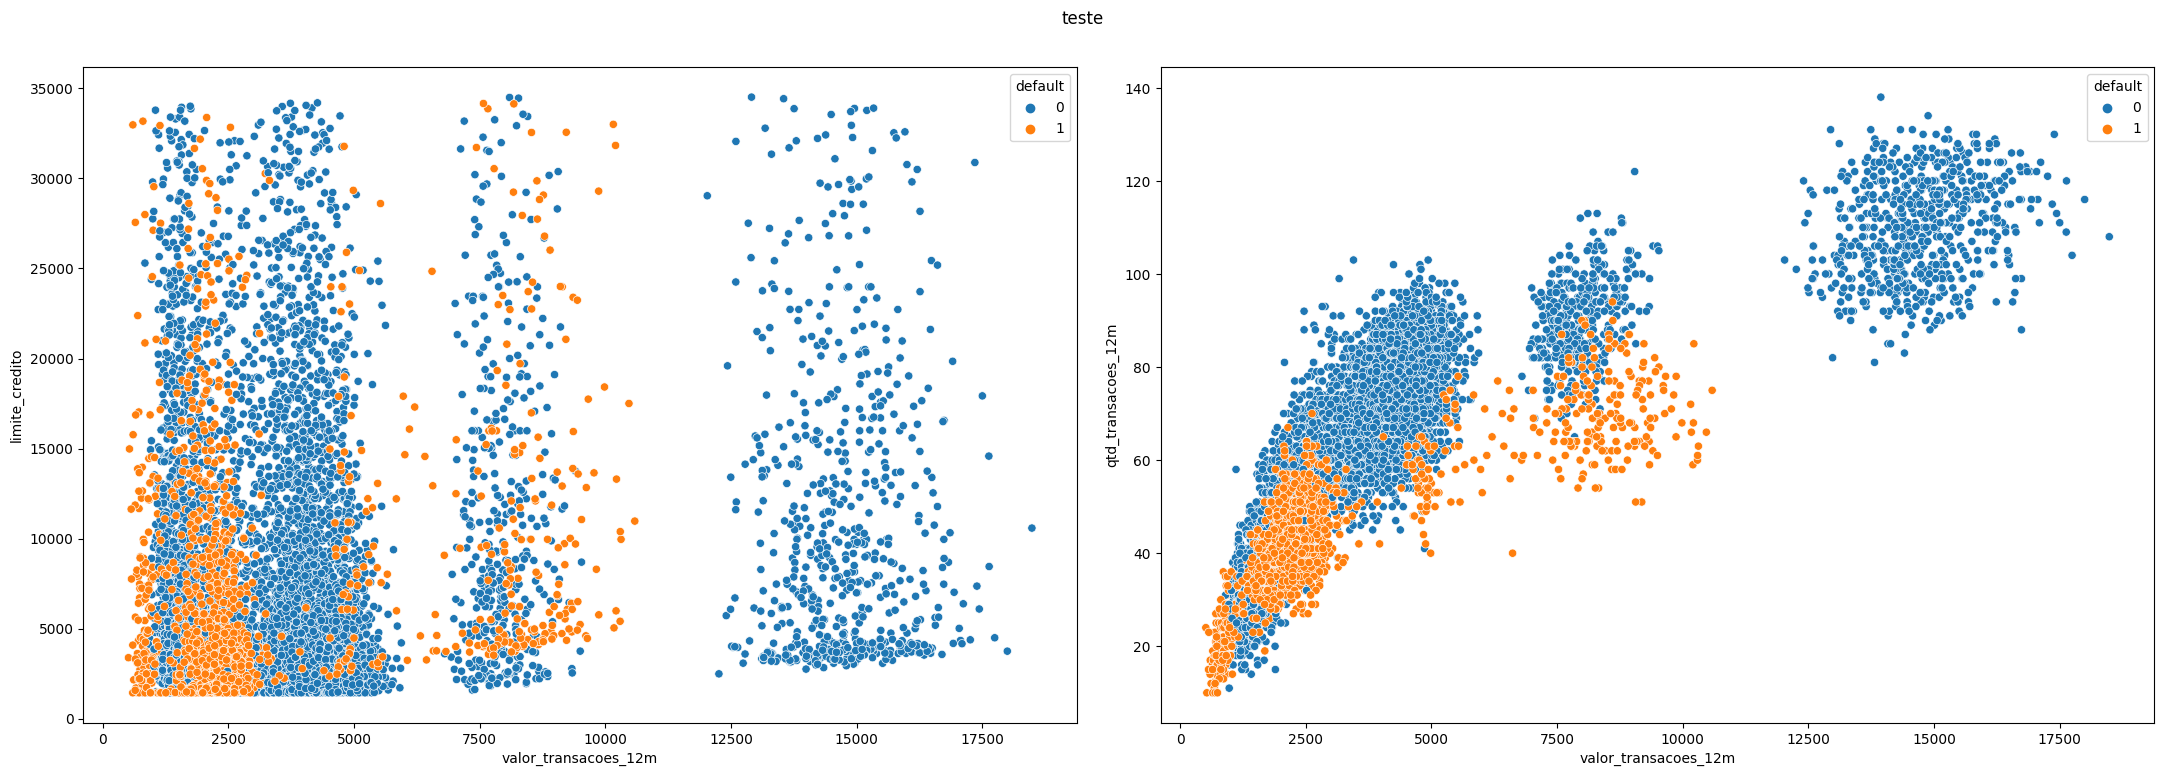

In [102]:
plota_dispersao(dataframe=df, conjunto=['limite_credito', 'qtd_transacoes_12m'], var='valor_transacoes_12m', titulo='teste', legenda='default', tamanho_figura=(22,8))

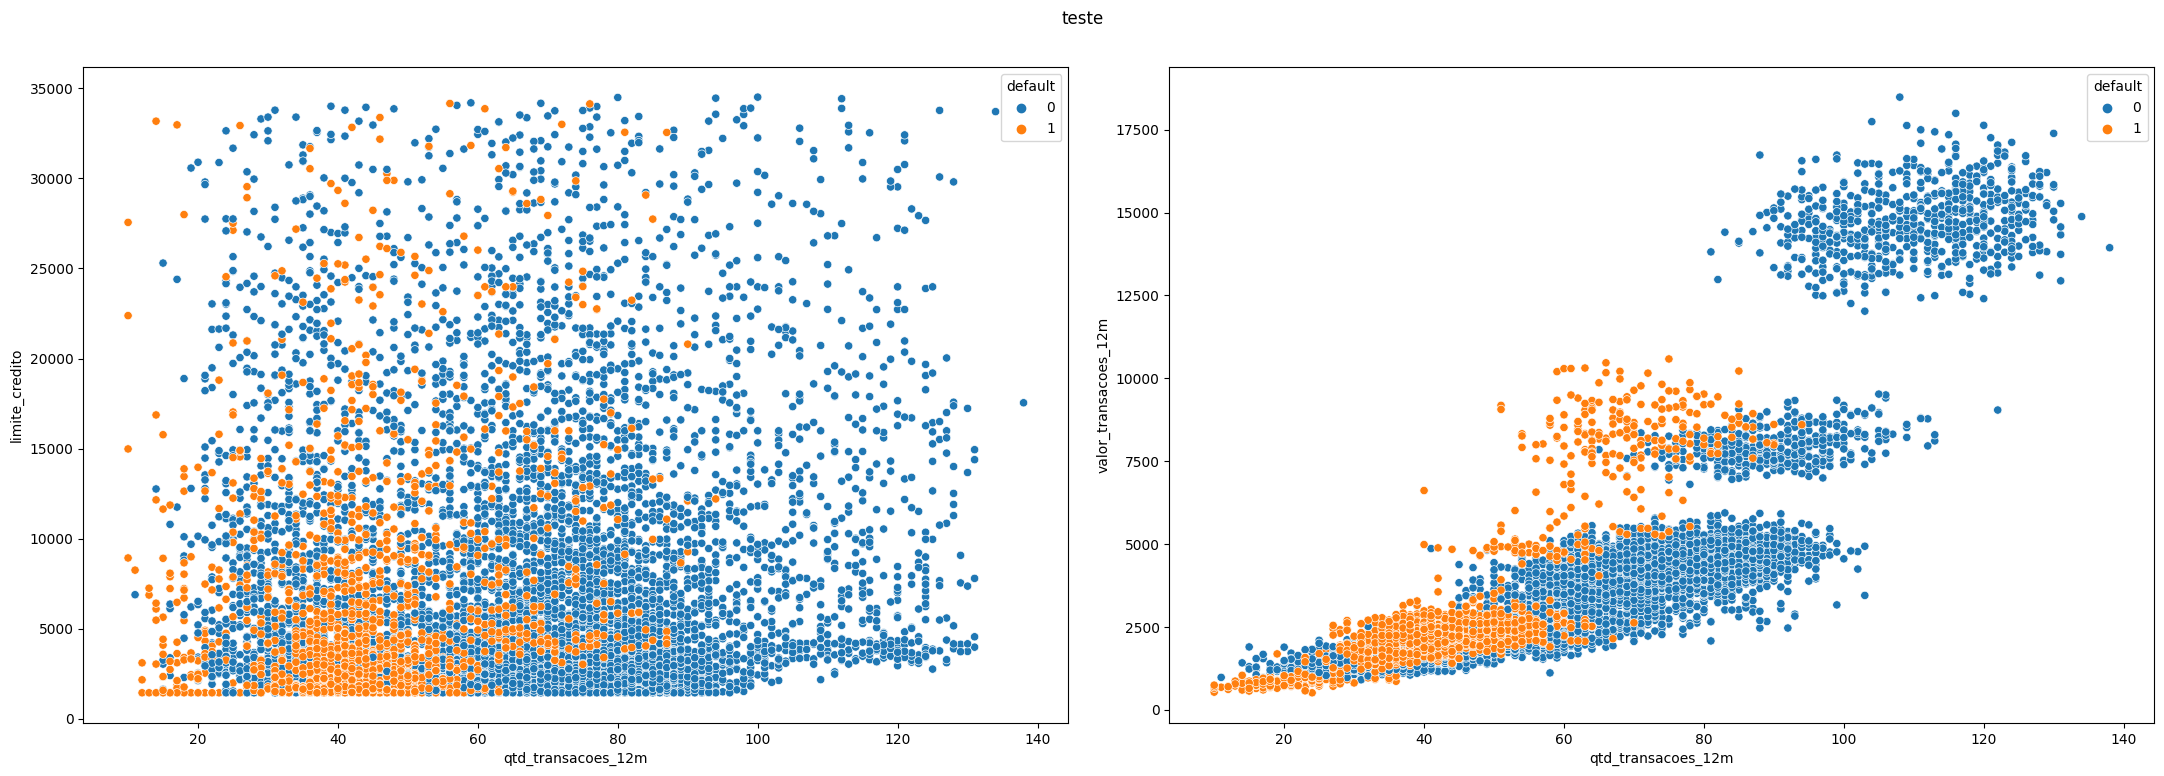

In [103]:
plota_dispersao(dataframe=df, conjunto=['limite_credito', 'valor_transacoes_12m'], var='qtd_transacoes_12m', titulo='teste', legenda='default', tamanho_figura=(22,8))

Há forte relação entre a quantidade de transações e o valor das mesmas, o que indica que clientes que utilizam mais a funcionalidade do cartão tendem a gastar mais com o mesmo. Além disso, há uma clara distinção no perfil de gasto entre clientes adimplentes e inadimplentes, na medida em que clientes inadimplentes tendem a realizar um número médio de transações consideralvemente menor, com menor valor médio das operações. O limite de crédito parece não apresentar distinção significativa entre clientes dos dois tipos.

## <a id='toc1_5_'></a>[Conclusão](#toc0_)


A exploração dos dados de crédito aponta que várias das características de perfil são semelhantes entre clientes adimplentes e inadimplentes, assim, é difícil diferenciá-los a partir de qualquer característica individual. No entanto, é possível verificar diferenças entre os grupos de adimplentes e inadimplentes a partir do uso do cartão de crédito: em um geral, os clientes inadimplentes tendem a utilizar menos o cartão e gastam menos com as transações, contratam menos produtos e deixam de utilizar o cartão por maiores períodos de tempo. Um modelo eficiente de diferenciação do tipo de cliente, a fim de verificar possíveis candidatos ao aumento de crédito, deve considerar principalmente as características de uso do cartão. Devem ser considerados mais aptos para a concessão de crédito os clientes ativos, com uso regular do cartão e que dispendem mais dinheiro nas transções.